In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadridwanw","key":"5fbef33486f5340eeef5710c110fb131"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 71 Jun 29 13:59 kaggle.json


In [3]:
!kaggle datasets download -d uciml/mushroom-classification

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 36.3MB/s]


In [4]:
!unzip mushroom-classification -d dataset
!ls -l dataset

Archive:  mushroom-classification.zip
  inflating: dataset/mushrooms.csv   
total 368
-rw-r--r-- 1 root root 374003 Sep 20  2019 mushrooms.csv


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [6]:
data = pd.read_csv('dataset/mushrooms.csv')

Note dari dataset :
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
for column in data.columns:
  print(f"Unique values before LE in {column}: {data[column].unique()}")

Unique values before LE in class: ['p' 'e']
Unique values before LE in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values before LE in cap-surface: ['s' 'y' 'f' 'g']
Unique values before LE in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values before LE in bruises: ['t' 'f']
Unique values before LE in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values before LE in gill-attachment: ['f' 'a']
Unique values before LE in gill-spacing: ['c' 'w']
Unique values before LE in gill-size: ['n' 'b']
Unique values before LE in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values before LE in stalk-shape: ['e' 't']
Unique values before LE in stalk-root: ['e' 'c' 'b' 'r' '?']
Unique values before LE in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values before LE in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values before LE in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values before LE in stalk-color-below-ring: ['

columns yang digunakan : ["gill-color", "ring-number", "ring-type", "population", "habitat", "bruises", "gill-size", "spore-print-color", "cap-shape", "cap-surface", "cap-color"]  <br>


In [10]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [11]:
for column in data.columns:
  print(f"Unique values after LE in {column}: {data[column].unique()}")


Unique values after LE in class: [1 0]
Unique values after LE in cap-shape: [5 0 4 2 3 1]
Unique values after LE in cap-surface: [2 3 0 1]
Unique values after LE in cap-color: [4 9 8 3 2 5 0 7 1 6]
Unique values after LE in bruises: [1 0]
Unique values after LE in odor: [6 0 3 5 2 1 8 7 4]
Unique values after LE in gill-attachment: [1 0]
Unique values after LE in gill-spacing: [0 1]
Unique values after LE in gill-size: [1 0]
Unique values after LE in gill-color: [ 4  5  2  7 10  3  9  1  0  8 11  6]
Unique values after LE in stalk-shape: [0 1]
Unique values after LE in stalk-root: [3 2 1 4 0]
Unique values after LE in stalk-surface-above-ring: [2 0 1 3]
Unique values after LE in stalk-surface-below-ring: [2 0 3 1]
Unique values after LE in stalk-color-above-ring: [7 3 6 4 0 2 5 1 8]
Unique values after LE in stalk-color-below-ring: [7 6 3 0 4 2 8 5 1]
Unique values after LE in veil-type: [0]
Unique values after LE in veil-color: [2 0 1 3]
Unique values after LE in ring-number: [1 2 0]


In [12]:
cn = data.corr()

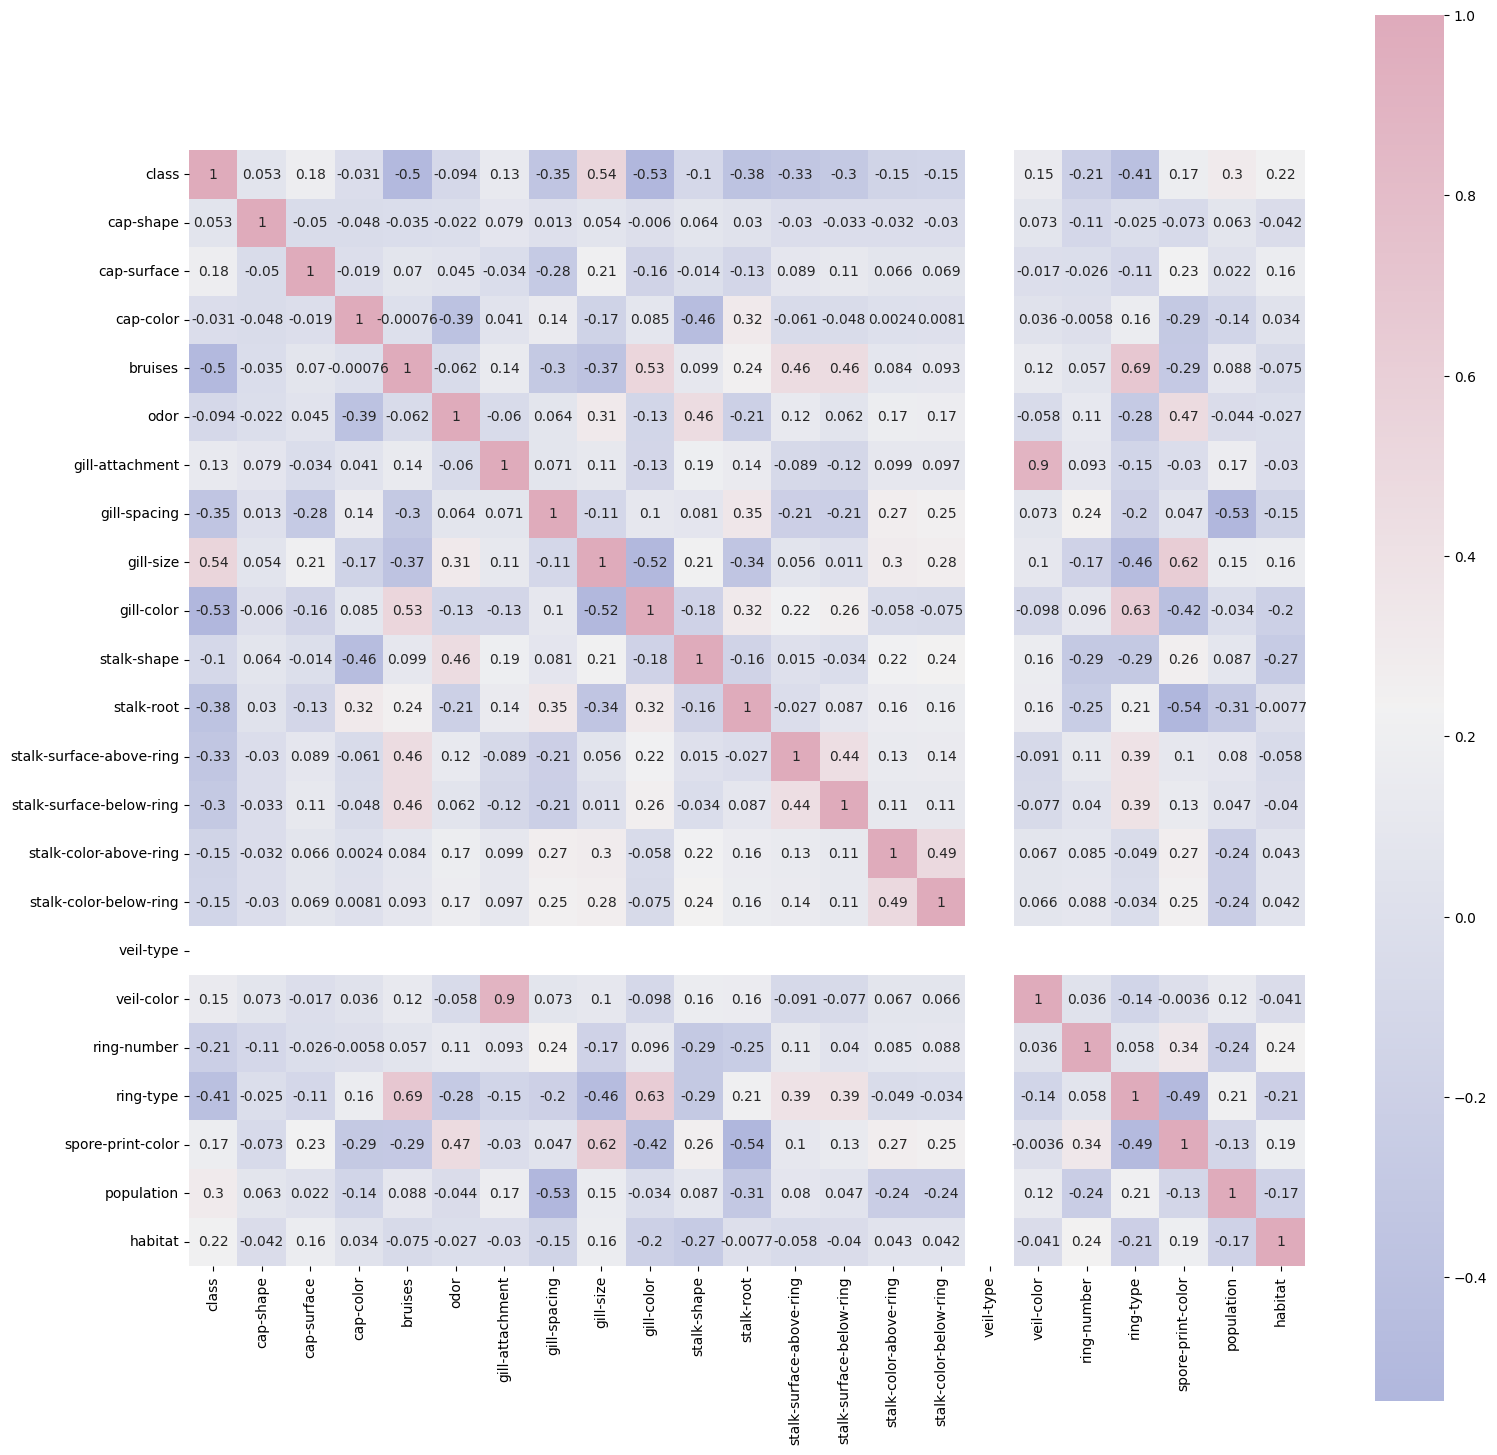

In [13]:
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [14]:
features = ["gill-color", "ring-number", "ring-type", "population", "habitat", "bruises", "gill-size", "spore-print-color", "cap-shape", "cap-surface", "cap-color"]
x = data[features].values
y = data["class"].values
x

array([[ 4,  1,  4, ...,  5,  2,  4],
       [ 4,  1,  4, ...,  5,  2,  9],
       [ 5,  1,  4, ...,  0,  2,  8],
       ...,
       [ 5,  1,  4, ...,  2,  2,  4],
       [ 0,  1,  0, ...,  3,  3,  4],
       [11,  1,  4, ...,  5,  2,  4]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=32)

In [16]:
model = Sequential([
    Dense(8, activation='relu',  input_shape=[x.shape[1]]),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1329 (5.19 KB)
Trainable params: 1329 (5.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


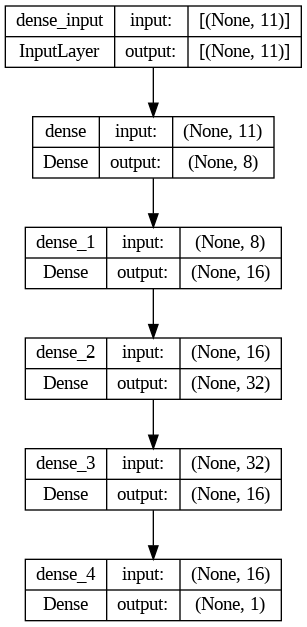

In [18]:
plot_model(model, show_shapes=True)

In [19]:
history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=10
)

Epoch 1/25
569/569 [==============================] - 8s 5ms/step - loss: 0.3741 - accuracy: 0.8368
Epoch 2/25
569/569 [==============================] - 3s 5ms/step - loss: 0.2075 - accuracy: 0.9205
Epoch 3/25
569/569 [==============================] - 3s 6ms/step - loss: 0.1552 - accuracy: 0.9465
Epoch 4/25
569/569 [==============================] - 2s 4ms/step - loss: 0.1211 - accuracy: 0.9562
Epoch 5/25
569/569 [==============================] - 4s 8ms/step - loss: 0.0933 - accuracy: 0.9669
Epoch 6/25
569/569 [==============================] - 3s 5ms/step - loss: 0.0757 - accuracy: 0.9727
Epoch 7/25
569/569 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9785
Epoch 8/25
569/569 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9838
Epoch 9/25
569/569 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9889
Epoch 10/25
569/569 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9928

In [20]:
data[["gill-color", "ring-number", "ring-type", "population", "habitat", "bruises", "gill-size", "spore-print-color", "cap-shape", "cap-surface", "cap-color", "class"]].head()

,gill-color,ring-number,ring-type,population,habitat,bruises,gill-size,spore-print-color,cap-shape,cap-surface,cap-color,class
0,4,1,4,3,5,1,1,2,5,2,4,1
1,4,1,4,2,1,1,0,3,5,2,9,0
2,5,1,4,2,3,1,0,3,0,2,8,0
3,5,1,4,3,5,1,1,2,5,3,8,1
4,4,1,0,0,1,0,0,3,5,2,3,0


In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

77/77 - 0s - loss: 0.0013 - accuracy: 1.0000 - 243ms/epoch - 3ms/step
Loss: 0.0013
Accuracy: 1.0000


In [22]:
prediction = model.predict([[4,	1,	4,	3,	5,	1,	1,	2,	5,	2,	4]])
print(prediction)

if prediction > 0.5:
    print("Poisonous")
else:
    print("Edible")

1/1 [==============================] - 0s 129ms/step
[[0.99989325]]
Poisonous


In [23]:
prediction = model.predict([[4,	1,	4,	2,	1,	1,	0,	3,	5,	2,	9]])
print(prediction)

if prediction > 0.5:
    print("Poisonous")
else:
    print("Edible")

1/1 [==============================] - 0s 35ms/step
[[2.4584602e-07]]
Edible


77/77 [==============================] - 0s 1ms/step


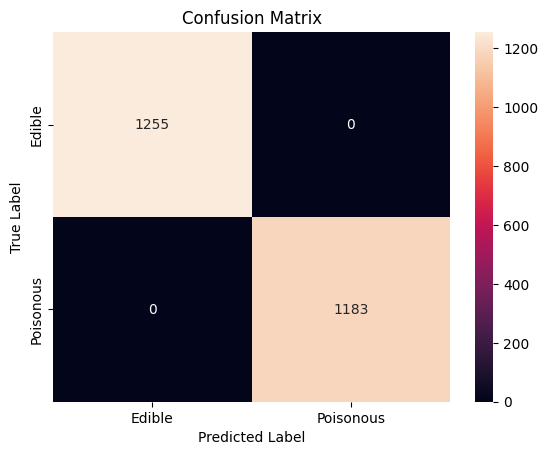

In [24]:
# Predict the labels for the test data
y_pred = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for the axes
labels = ['Edible', 'Poisonous']

# Create a confusion matrix plot
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [25]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
]
tflite_model = converter.convert()

# Save the model to disk
open("converted_model.tflite", "wb").write(tflite_model)

8192